# Librería GEG

Autor: Alan Badillo Salas

## Introducción

Aquí se describe la librería `geg.py` construida para el curso de python con aplicaciones científicas.

## Parte I - Adquisición de datos

### 1. Cargar una matríz de datos desde un archivo de excel

In [5]:
import openpyxl as xl
import geg

# Creamos un workbook
wb = xl.load_workbook("recursos/datos.xlsx", data_only=True)

# Obtenemos la matriz de celdas del excel y los mandamos a `load_mat`
mat = geg.load_mat(wb["Hoja 1"]["A2:B5"])

print mat

[[1, 1], [2, 4], [3, 9], [4, 16]]


### 2. Cargar una lista de diccionarios desde un archivo de excel

In [9]:
import openpyxl as xl
import geg

wb = xl.load_workbook("recursos/datos.xlsx", data_only=True)

labels, datos = geg.load_data(wb["Hoja 1"]["A1:B5"])

print labels

print datos

[u'X', u'Y']
[{u'Y': 1, u'X': 1}, {u'Y': 4, u'X': 2}, {u'Y': 9, u'X': 3}, {u'Y': 16, u'X': 4}]


> Observe que `load_data` supone que la primer fila es la de las etiquetas y devuelve una lista de las etiquetas y una lista de diccionarios, donde cada diccionario contiene las etiquetas de las columnas (no ordenadas) y sus valores.

### 3. Recuperar/Ajustar datos en matrices y listas de diccionarios

In [15]:
print mat
print datos

# Imprimir el valor de la tercer fila, segunda columna
print "Matriz(fila=3, columna=2):", mat[2][1]

# Imprimir el valor de la tercer fila, columna `Y`
print "Datos(fila=3, columna=Y)", datos[2]["Y"]

[[1, 1], [2, 4], [3, 9], [4, 16]]
[{u'Y': 1, u'X': 1}, {u'Y': 4, u'X': 2}, {u'Y': 9, u'X': 3}, {u'Y': 16, u'X': 4}]
Matriz(fila=3, columna=2): 9
Datos(fila=3, columna=Y) 9


> Observe que la matriz y la lista de diccionarios es equivalente, pero en la lista de diccionarios las columnas son nombradas, lo cual hace más fácil recuperar los datos.

### 4. Generar una lista con la suma de dos columnas (X, Y)

In [17]:
SM = geg.data_map(mat, lambda row: row[0] + row[1])

print SM

SD = geg.data_map(datos, lambda dic: dic["X"] + dic["Y"])

print SD

[2, 6, 12, 20]
[2, 6, 12, 20]


> Observe que la diferencia de aplicar `data_map` a una matriz y a una lista de diccionarios es que la matriz es una lista de filas (row) y la lista de diccionarios contiene claves en lugar de indices.

### 5. Generar una nueva columna a partir de los datos de las otras columnas

In [10]:
datos = [
    { "X": 1, "Y": 5 },
    { "X": 2, "Y": 1 },
    { "X": 3, "Y": 3 },
    { "X": 4, "Y": 2 },
    { "X": 5, "Y": 4 }
]

print datos

geg.data_append(datos, "Z", lambda dic: dic["X"] - dic["Y"])

print datos

[{'Y': 5, 'X': 1}, {'Y': 1, 'X': 2}, {'Y': 3, 'X': 3}, {'Y': 2, 'X': 4}, {'Y': 4, 'X': 5}]
[{'Y': 5, 'X': 1, 'Z': -4}, {'Y': 1, 'X': 2, 'Z': 1}, {'Y': 3, 'X': 3, 'Z': 0}, {'Y': 2, 'X': 4, 'Z': 2}, {'Y': 4, 'X': 5, 'Z': 1}]


* Ejercicio: Crear la columna `W` para los datos anteriores (`X`, `Y`, `Z`) bajo la regla: `2 * x + y * z ** 2`

In [14]:
geg.data_append(datos, "W", lambda dic: 2 * dic["X"] + dic["Y"] * dic["Z"] ** 2)

print "X", geg.data_column(datos, "X")
print "Y", geg.data_column(datos, "Y")
print "Z", geg.data_column(datos, "Z")
print "W", geg.data_column(datos, "W")

X [1, 2, 3, 4, 5]
Y [5, 1, 3, 2, 4]
Z [-4, 1, 0, 2, 1]
W [82, 5, 6, 16, 14]


### 6. Decodificar un dato de cadena en uno numérico

In [2]:
import geg

datos = [
    { "Sexo": "Hombre" },
    { "Sexo": "Mujer" },
    { "Sexo": "Hombre" },
    { "Sexo": "Mujer" },
    { "Sexo": "Hombre" },
    { "Sexo": "ND" },
    { "Sexo": "Trans" },
    { "Sexo": "Hombre" }
]

values = geg.data_transform(datos, "Sexo", "Sexo_Num")

print values

print geg.data_column(datos, "Sexo_Num")

TypeError: 'builtin_function_or_method' object has no attribute '__getitem__'

## Parte II - Graficación

### 1. Graficar datos categóricos en forma de pastel

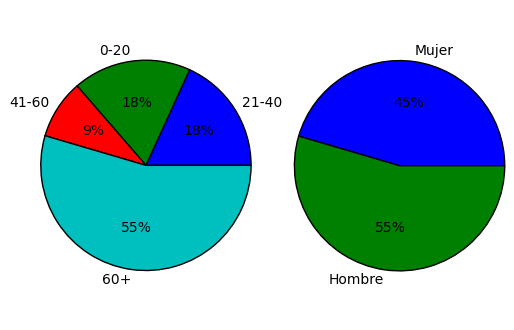

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import geg

# Definimos cuantos ejes queremos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

datos = [
    { "Edad": 12, "Sexo": "Hombre" },
    { "Edad": 23, "Sexo": "Mujer" },
    { "Edad": 34, "Sexo": "Mujer" },
    { "Edad": 45, "Sexo": "Hombre" },
    { "Edad": 67, "Sexo": "Hombre" },
    { "Edad": 78, "Sexo": "Mujer" },
    { "Edad": 89, "Sexo": "Hombre" },
    { "Edad": 98, "Sexo": "Hombre" },
    { "Edad": 87, "Sexo": "Mujer" },
    { "Edad": 76, "Sexo": "Hombre" },
    { "Edad": 18, "Sexo": "Mujer" }
]

geg.data_cat(datos, "Edad_Cat", {
    "0-20": lambda dic: dic["Edad"] <= 20,
    "21-40": lambda dic: dic["Edad"] > 20 and dic["Edad"] <= 40,
    "41-60": lambda dic: dic["Edad"] > 40 and dic["Edad"] <= 60,
    "60+": lambda dic: dic["Edad"] > 60
})

geg.plot_pie(ax1, datos, "Edad_Cat")
geg.plot_pie(ax2, datos, "Sexo")

ax1.axis("equal")
ax2.axis("equal")

plt.show()

### 2. Generar un histograma de datos repetibles

['Hombre', 'Mujer', 'Mujer', 'Hombre', 'Hombre', 'Mujer', 'Hombre', 'Hombre', 'Mujer', 'Hombre', 'Hombre']
[1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1]


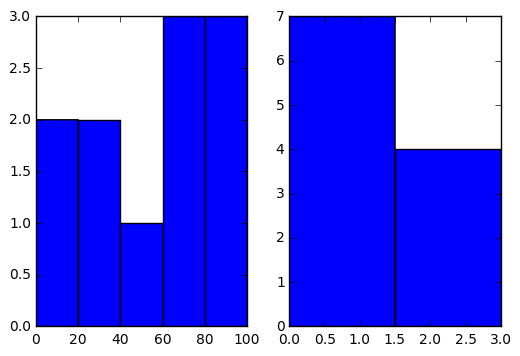

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import geg

# Definimos cuantos ejes queremos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

datos = [
    { "Edad": 12, "Sexo": "Hombre" },
    { "Edad": 23, "Sexo": "Mujer" },
    { "Edad": 34, "Sexo": "Mujer" },
    { "Edad": 45, "Sexo": "Hombre" },
    { "Edad": 67, "Sexo": "Hombre" },
    { "Edad": 78, "Sexo": "Mujer" },
    { "Edad": 89, "Sexo": "Hombre" },
    { "Edad": 98, "Sexo": "Hombre" },
    { "Edad": 87, "Sexo": "Mujer" },
    { "Edad": 76, "Sexo": "Hombre" },
    { "Edad": 18, "Sexo": "Hombre" }
]

sexo_trans = {
    "Hombre": 1,
    "Mujer": 2
}

geg.data_append(datos, "Sexo_Num", lambda dic: sexo_trans[dic["Sexo"]])

print geg.data_column(datos, "Sexo")
print geg.data_column(datos, "Sexo_Num")

geg.plot_hist(ax1, 5, 0, 100, datos, "Edad")
geg.plot_hist(ax2, 2, 0, 3, datos, "Sexo_Num")

plt.show()